In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [481]:
cars = pd.read_csv("data/used_car_sales.csv")
initial_count = len(cars)

# Rename Columns
cars = cars.rename(columns={"pricesold":"SalePrice", "yearsold":"YearSold", "BodyType":"VehicleClass", "DriveType":"Drive", "NumCylinders":"Cylinders", "zipcode":"Zip"})
cars = cars.set_index(cars.ID)

print(f"Dataset has {initial_count} rows\n")
print(cars.dtypes)

Dataset has 122144 rows

ID               int64
SalePrice        int64
YearSold         int64
Zip             object
Mileage          int64
Make            object
Model           object
Year             int64
Trim            object
Engine          object
VehicleClass    object
Cylinders        int64
Drive           object
dtype: object


In [482]:
# Dropping rows with null data in columns of interest
cars = cars.dropna(subset=["ID", "SalePrice", "YearSold", "Mileage", "Make", "Model", "Year", "Engine", "VehicleClass", "Drive"])
count1 = len(cars)
print(f"Dropped {initial_count-count1} rows with null values\n")

# Remove duplicate rows based on some columns
cars = cars.drop_duplicates(subset=["SalePrice","YearSold","Mileage","Make","Year"])
count2 = len(cars)
print(f"Dropped {count1 - count2} duplicate rows\n")

# String formatting
string_columns = cars.select_dtypes(["object"])
cars[string_columns.columns] = string_columns.apply(lambda x: x.str.strip()).apply(lambda x: x.str.upper())
cars.describe()

Dropped 42159 rows with null values

Dropped 47 duplicate rows



,ID,SalePrice,YearSold,Mileage,Year,Cylinders
count,79938.000000,79938.000000,79938.000000,7.993800e+04,7.993800e+04,7.993800e+04
mean,84701.838750,10866.223698,2019.372526,9.314208e+05,3.496387e+03,2.686986e+04
std,47707.302068,13604.708975,0.502736,2.675838e+07,1.731962e+05,7.595445e+06
min,1.000000,0.000000,2018.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,43980.250000,3000.000000,2019.000000,4.700000e+04,1.986000e+03,4.000000e+00
50%,85272.500000,6600.000000,2019.000000,9.241750e+04,2.002000e+03,6.000000e+00
75%,125657.750000,14100.000000,2020.000000,1.431702e+05,2.009000e+03,8.000000e+00
max,165801.000000,404990.000000,2020.000000,1.234568e+09,2.014000e+07,2.147484e+09


In [483]:
# Removing some numerical values that don't make sense - based on above .describe()
cars = cars[cars["SalePrice"] > 100]
cars = cars[cars["Mileage"] > 10]
cars = cars[cars["Mileage"] < 1000000]
cars = cars[cars["Year"] > 1900]
cars = cars[cars["Year"] < 2021]
cars = cars[cars["Cylinders"] > 1]
cars = cars[cars["Cylinders"] < 20]
count3 = len(cars)
print(f"Dropped {count2 - count3} numerical values")

# Removing some nonsense string values - by inspection of some data
cars = cars[~cars["Make"].str.contains("OTHER")]
cars = cars[~cars["Make"].str.contains("REPLICA")]

count4 = len(cars)
print(f"Dropped {count3 - count4} nonsense strings")

Dropped 14947 numerical values
Dropped 136 nonsense strings


In [484]:

cars.describe()

,ID,SalePrice,YearSold,Mileage,Year,Cylinders
count,64855.000000,64855.000000,64855.000000,64855.000000,64855.000000,64855.000000
mean,82233.044684,10785.587387,2019.344337,106151.105512,1995.826814,6.562023
std,47209.447081,13041.553873,0.496266,96687.938581,18.162099,1.653189
min,1.000000,110.000000,2018.000000,11.000000,1909.000000,2.000000
25%,42308.000000,3000.000000,2019.000000,49114.500000,1985.000000,6.000000
50%,81949.000000,6680.000000,2019.000000,93196.000000,2002.000000,6.000000
75%,121856.500000,14200.000000,2020.000000,143269.500000,2009.000000,8.000000
max,165801.000000,365000.000000,2020.000000,999999.000000,2020.000000,16.000000


array([[<Axes: title={'center': 'Mileage'}>]], dtype=object)

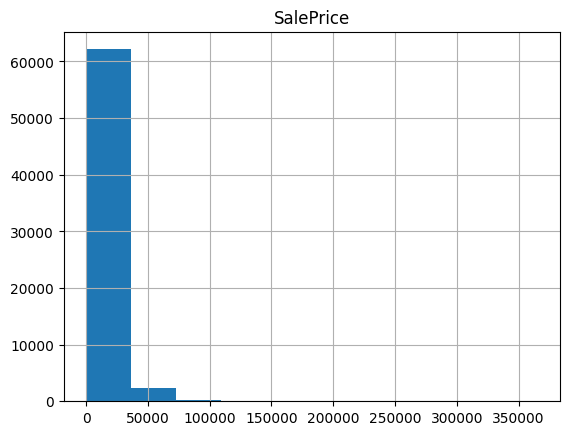

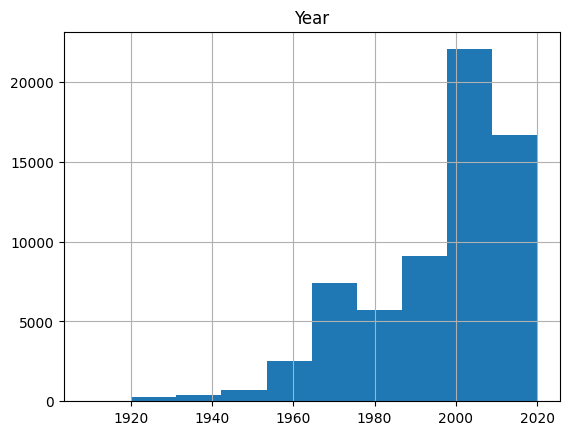

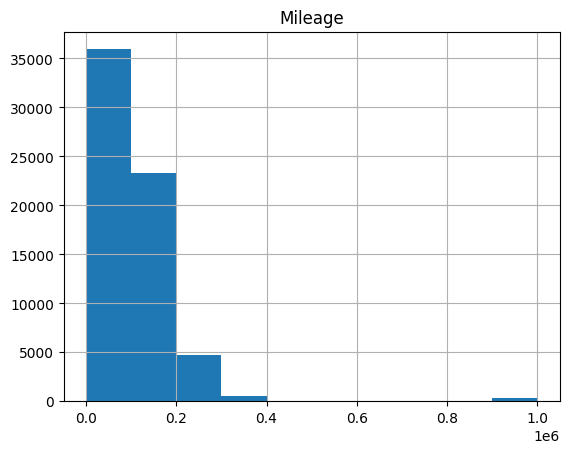

In [485]:
# Histograms for numerical data columns
cars.hist(column=["SalePrice"])
cars.hist(column=["Year"])
cars.hist(column=["Mileage"])

<Axes: xlabel='Mileage', ylabel='SalePrice'>

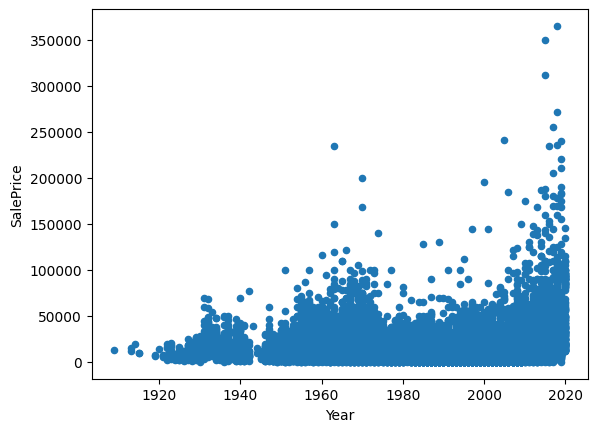

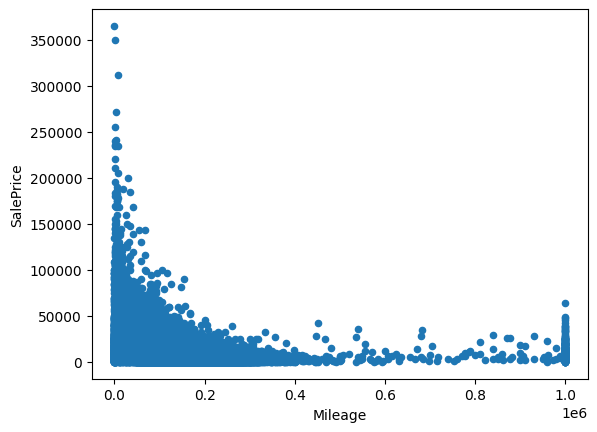

In [486]:
# Scatter Plots on numerical data
cars.plot.scatter(x="Year", y="SalePrice")
cars.plot.scatter(x="Mileage", y="SalePrice")

<Axes: xlabel='MilesPerYear', ylabel='SalePrice'>

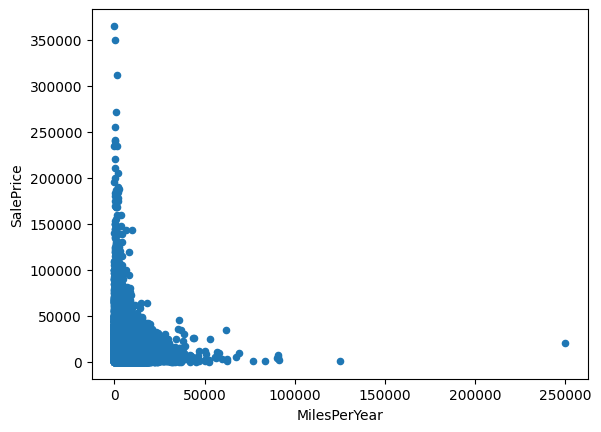

In [487]:
# New feature - average mileage per year
cars = cars.assign(e=lambda df: df.Mileage/(2022-df.Year)).rename(columns={"e":"MilesPerYear"})
cars.plot.scatter(x="MilesPerYear", y="SalePrice")

In [488]:
# Investigate extreme values
highestMPY = cars[cars["MilesPerYear"] == cars["MilesPerYear"].max()]
highestPrice = cars[cars["SalePrice"] == cars["SalePrice"].max()]

print(highestMPY)
print()
print(highestPrice)

          ID  SalePrice  YearSold    Zip  Mileage  Make  Model  Year  \
ID                                                                     
33270  33270      20300      2019  46173   999999  FORD  F-150  2018   

                                               Trim   Engine     VehicleClass  \
ID                                                                              
33270  F150 SUPER CREW XLT 4X4 5'5 BED FX4 OFF ROAD  5.0L V8  CREW CAB PICKUP   

       Cylinders             Drive  MilesPerYear  
ID                                                
33270          8  4X4 FX4 OFF ROAD     249999.75  

          ID  SalePrice  YearSold    Zip  Mileage     Make Model  Year  \
ID                                                                       
10039  10039     365000      2019  77005       36  PORSCHE   911  2018   

         Trim  Engine VehicleClass  Cylinders Drive  MilesPerYear  
ID                                                                 
10039  GT2 RS  700 HP     

<Axes: xlabel='MilesPerYear', ylabel='SalePrice'>

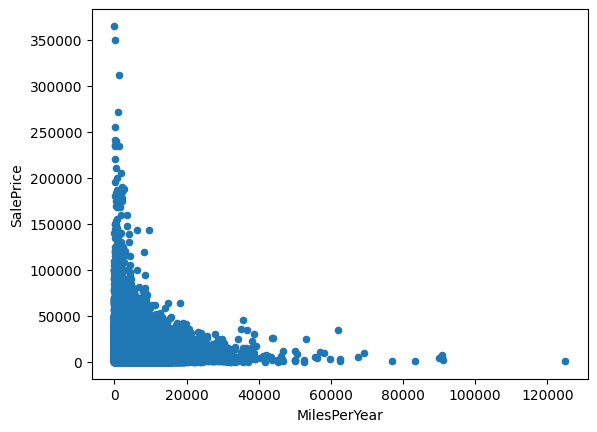

In [489]:
# Mileage outlier doesn't make sense - ~200000 miles per year
cars = cars.drop(highestMPY.ID)

cars.plot.scatter(x="MilesPerYear", y="SalePrice")

In [490]:
# Zip Code Table for additional location data
zipcodes = pd.read_csv("data/zip_code_database.csv")
print(zipcodes.dtypes)

zip                           int64
type                         object
decommissioned                int64
primary_city                 object
acceptable_cities            object
unacceptable_cities          object
state                        object
county                       object
timezone                     object
area_codes                   object
world_region                 object
country                      object
latitude                    float64
longitude                   float64
irs_estimated_population      int64
dtype: object


In [491]:
# Select only rows pertaining to US zipcodes
zipcodes = zipcodes.dropna(subset=["zip", "state", "country", "county"])
zipcodes = zipcodes[zipcodes["country"].str.contains("US")]

# Select useful columns
zipcodes = zipcodes[["zip", "state", "county", "latitude", "longitude"]]
zipcodes = zipcodes.rename(columns={"zip":"Zip", "state":"State", "county":"County","latitude":"Latitude", "longitude":"Longitude"})

# String formatting
string_columns = zipcodes.select_dtypes(["object"])
zipcodes[string_columns.columns] = string_columns.apply(lambda s: s.str.strip()).apply(lambda s: s.str.upper())

# Format zip column in car sales dataset
cars["Zip"] = cars["Zip"].apply(lambda x: str(x).rstrip(r"[*]"))
zipcodes["Zip"] = zipcodes["Zip"].apply(lambda s: str(s))

# Create different sample to perform location based analysis, remove zipcode from main dataset
carsWithZip = cars[cars["Zip"].str.len() == 5]
cars = cars[["ID", "SalePrice", "YearSold", "Mileage", "Make", "Model", "Year", "Engine", "VehicleClass", "Drive"]]

# Merge cars dataframe with zipcodes dataframe
carsWithZip = carsWithZip.merge(right=zipcodes, how="left", left_on="Zip", right_on="Zip")
carsWithZip = carsWithZip.dropna(subset=["State"])

In [492]:
# Some EDA on car sales in different states:
print("Car Sales in New York:")
carsWithZipNY = carsWithZip[carsWithZip["State"] == "NY"]
carsWithZipNY.describe()

Car Sales in New York:


,ID,SalePrice,YearSold,Mileage,Year,Cylinders,MilesPerYear,Latitude,Longitude
count,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000
mean,59999.734394,9717.804978,2019.079559,95987.944920,1995.335373,6.655651,5217.395164,41.518054,-74.559380
std,33010.578047,11452.646228,0.317828,77383.740113,17.963527,1.624980,4275.362463,1.031445,1.675061
min,8.000000,150.000000,2018.000000,15.000000,1923.000000,2.000000,1.000000,40.510000,-79.710000
25%,33993.000000,3050.000000,2019.000000,51000.000000,1985.000000,6.000000,1724.752653,40.720000,-74.495000
50%,63011.000000,6300.000000,2019.000000,86152.000000,2002.000000,6.000000,4307.900000,40.920000,-73.910000
75%,86608.500000,12100.000000,2019.000000,128000.000000,2008.000000,8.000000,7828.972050,42.335000,-73.630000
max,129218.000000,169000.000000,2020.000000,999999.000000,2020.000000,12.000000,38800.000000,44.990000,-72.190000


In [493]:
print("Car Sales in California:")
carsWithZipCA = carsWithZip[carsWithZip["State"] == "CA"]
carsWithZipCA.describe()

Car Sales in California:


,ID,SalePrice,YearSold,Mileage,Year,Cylinders,MilesPerYear,Latitude,Longitude
count,7271.000000,7271.000000,7271.000000,7271.000000,7271.000000,7271.000000,7271.000000,7271.000000,7271.000000
mean,65123.015266,6590.184294,2019.105900,134686.462110,1994.587952,6.237794,6391.601659,34.621219,-118.574332
std,35682.427408,11418.972812,0.349584,92556.491826,15.447945,1.712719,4351.956137,1.711334,1.567784
min,7.000000,110.000000,2018.000000,20.000000,1922.000000,2.000000,0.350877,32.550000,-124.160000
25%,33796.500000,985.000000,2019.000000,80000.000000,1988.000000,4.000000,2726.208827,33.780000,-118.430000
50%,64840.000000,2650.000000,2019.000000,128888.000000,2000.000000,6.000000,6187.500000,33.780000,-117.860000
75%,100533.000000,7400.000000,2019.000000,177227.000000,2005.000000,8.000000,9104.107143,34.170000,-117.860000
max,129509.000000,241110.000000,2020.000000,999999.000000,2019.000000,12.000000,37052.750000,41.780000,-115.190000


In [494]:
print("Car Sales in Texas:")
carsWithZipTX = carsWithZip[carsWithZip["State"] == "TX"]
carsWithZipTX.describe()

Car Sales in Texas:


,ID,SalePrice,YearSold,Mileage,Year,Cylinders,MilesPerYear,Latitude,Longitude
count,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000
mean,57741.207041,18242.874677,2019.071705,77939.994186,2001.738372,6.496770,5250.784497,30.700084,-96.687116
std,34528.798094,16853.316827,0.324588,94881.548667,18.968336,1.665769,4401.390129,1.725536,1.890346
min,48.000000,130.000000,2018.000000,12.000000,1926.000000,2.000000,0.218182,25.920000,-106.610000
25%,29713.750000,6340.000000,2019.000000,22872.750000,1993.000000,6.000000,1884.647727,29.620000,-97.300000
50%,56239.500000,15000.000000,2019.000000,51766.000000,2009.000000,6.000000,4333.311828,29.800000,-95.730000
75%,84375.500000,26897.500000,2019.000000,107919.000000,2016.000000,8.000000,7389.993182,32.680000,-95.560000
max,129386.000000,365000.000000,2020.000000,999999.000000,2020.000000,12.000000,38706.833333,36.430000,-93.750000


In [495]:
print("Car Sales in Kansas:")
carsWithZipKS = carsWithZip[carsWithZip["State"] == "KS"]
carsWithZipKS.describe()

Car Sales in Kansas:


,ID,SalePrice,YearSold,Mileage,Year,Cylinders,MilesPerYear,Latitude,Longitude
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,56424.129771,13574.961832,2019.049618,93439.328244,1987.767176,6.908397,4180.046441,38.234962,-96.564580
std,32621.135318,14311.352693,0.292662,115743.151679,22.208244,1.467139,4163.999538,0.674938,1.497629
min,175.000000,140.000000,2018.000000,99.000000,1927.000000,4.000000,1.042105,37.020000,-101.350000
25%,28826.500000,3087.500000,2019.000000,34011.000000,1969.000000,6.000000,1184.266323,37.700000,-97.310000
50%,56011.500000,8775.000000,2019.000000,74404.500000,1988.500000,8.000000,2617.244444,37.965000,-97.170000
75%,83720.250000,19575.000000,2019.000000,118635.000000,2008.000000,8.000000,6115.976190,38.880000,-95.210000
max,126660.000000,85000.000000,2020.000000,999999.000000,2018.000000,12.000000,22007.444444,39.840000,-94.620000
